<a href="https://colab.research.google.com/github/zohour-diaa-eldin/CNN_Article_Classification/blob/main/CNN_Articles_Text_Classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Articels text classification

## Git Data From Kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hadasu92/cnn-articles-after-basic-cleaning

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning
License(s): CC0-1.0
 69% 60.0M/87.4M [00:00<00:00, 107MB/s]
100% 87.4M/87.4M [00:00<00:00, 119MB/s]


In [ ]:
!unzip cnn-articles-after-basic-cleaning.zip

Archive:  cnn-articles-after-basic-cleaning.zip
  inflating: CNN_Articels_clean/CNN_Articels_clean.csv  
  inflating: CNN_Articels_clean_2/CNN_Articels_clean.csv  


## Import Important Libraries

In [ ]:
!pip install num2words

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import num2words
import pickle
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load Data

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


dataset = pd.read_csv('CNN_Articels_clean_2/CNN_Articels_clean.csv')

## Exploratory Data Analysis

In [ ]:
print('Shape: ', dataset.shape)

Shape:  (37949, 11)


In [ ]:
dataset.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [ ]:
print('Columns: ', dataset.columns)

Columns:  Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text'],
      dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            37949 non-null  int64 
 1   Author           37949 non-null  object
 2   Date published   37949 non-null  object
 3   Category         37949 non-null  object
 4   Section          37949 non-null  object
 5   Url              37949 non-null  object
 6   Headline         37949 non-null  object
 7   Description      37949 non-null  object
 8   Keywords         37949 non-null  object
 9   Second headline  37949 non-null  object
 10  Article text     37940 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.2+ MB


In [ ]:
duplicate_urls = dataset.Url.value_counts()[dataset.Url.value_counts() > 1]
print(duplicate_urls)

Series([], Name: count, dtype: int64)


In [ ]:


dataset.duplicated().sum()


0

In [ ]:
print("Null Values: ", dataset.isnull().sum())

Null Values:  Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       9
dtype: int64


In [ ]:
print('Category: ', dataset.Category.unique())

Category:  ['news' 'business' 'health' 'entertainment' 'sport' 'politics' 'travel'
 'vr' 'style']


In [ ]:
print('Section: ', dataset.Section.unique())

Section:  ['world' 'asia' 'success' 'investing' 'energy' 'perspectives'
 'business-food' 'media' 'business' 'tech' 'business-india' 'health'
 'entertainment' 'sport' 'motorsport' 'us' 'football' 'tennis' 'golf'
 'africa' 'opinions' 'europe' 'politics' 'china' 'economy' 'homes'
 'business-money' 'movies' 'celebrities' 'living' 'americas' 'middleeast'
 'india' 'weather' 'intl_world' 'cars' 'uk' 'showbiz' 'opinion' 'travel'
 'worldsport' 'australia' 'intl_business' 'vr' 'fashion' 'foodanddrink'
 'justice' 'app-news-section' 'cnn10' 'app-politics-section'
 'app-tech-section' 'skiing' 'equestrian' 'horseracing' 'sailing']


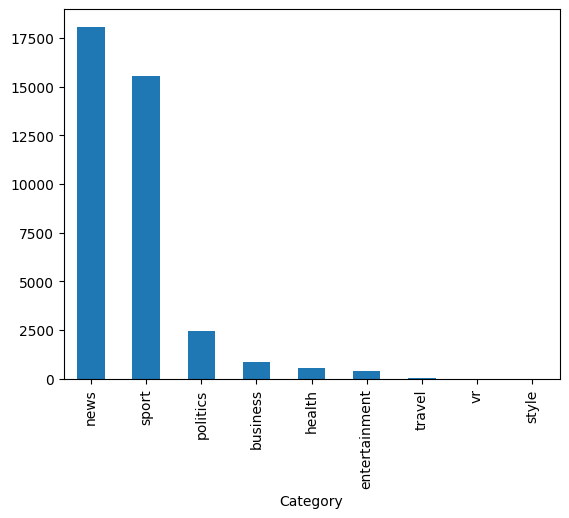

In [ ]:
dataset.Category.value_counts()[:15].plot(kind='bar'); #imbalanced data

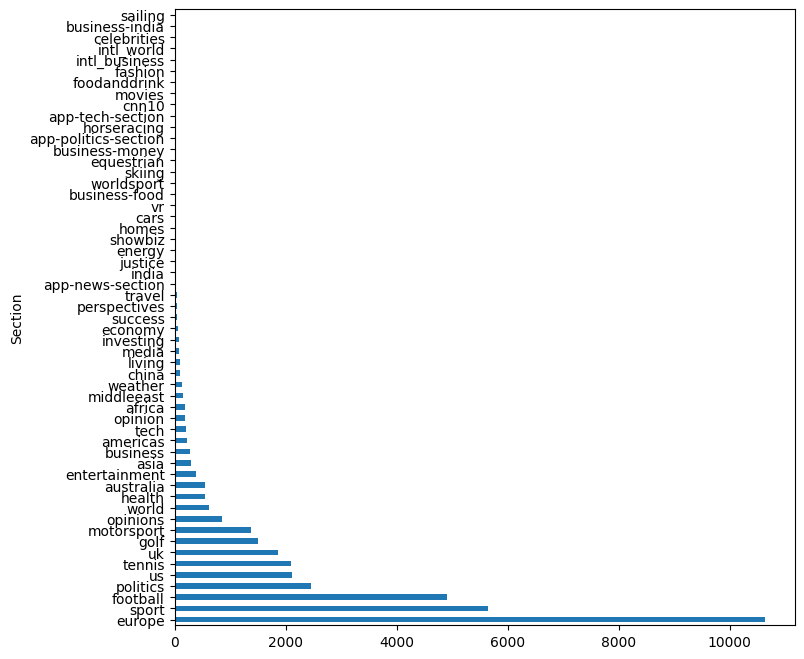

In [ ]:
dataset['Section'].value_counts().plot(kind='barh', figsize=(8, 8));

## Data Preprocessing

In [ ]:
# Fix - 1) There are no Dtypes
dataset['Author'] = dataset['Author'].astype('string')
dataset['Date published'] = dataset['Date published'].astype('datetime64[ns]')
dataset['Category'] = dataset['Category'].astype('category')
dataset['Section'] = dataset['Section'].astype('category')
dataset['Url'] = dataset['Url'].astype('string')
dataset['Headline'] = dataset['Headline'].astype('string')
dataset['Description'] = dataset['Description'].astype('string')
dataset['Keywords'] = dataset['Keywords'].astype('string')
dataset['Second headline'] = dataset['Second headline'].astype('string')
dataset['Article text'] = dataset['Article text'].astype('string')

In [ ]:
# Fix - 2) Article text contains null values
dataset.dropna(inplace=True)

In [ ]:
#Fix - 3) Author, Url, Keywords, etc column can contain the Category/Section name and can cause data leakage in classification
def fix_author(text):

    # Lowercasing
    text_clean = text.lower()

    # Remove Category/Section to avoid data leakage
    remove_words = []
    remove_words.extend(dataset.Category.unique())
    remove_words.extend(dataset.Section.unique())
    # more words to remove
    remove_words.extend(['CNN','By'])
    remove_words = [word.lower() for word in remove_words]
    text_clean = ' '.join([word for word in text_clean.split() if word not in remove_words])

    #split names
    authors = re.split(',| and',text_clean)

    # Remove special characters and numbers
    authors = [re.sub(r'[^a-z]', ' ', author) for author in authors]
    # concat name with ','
    authors = ", ".join(authors)


    return authors

In [ ]:
#Fix - 4) Date published contains the time of publishing - not relevant data
dataset['year'] = dataset['Date published'].dt.year
dataset['Date published'] = dataset['Date published'].dt.date
dataset['Date published']

,Date published
0,2021-07-15
1,2021-05-12
2,2021-06-16
3,2022-03-18
4,2022-03-19
...,...
37944,2022-03-01
37945,2022-03-01
37946,2022-03-01
37947,2013-01-12


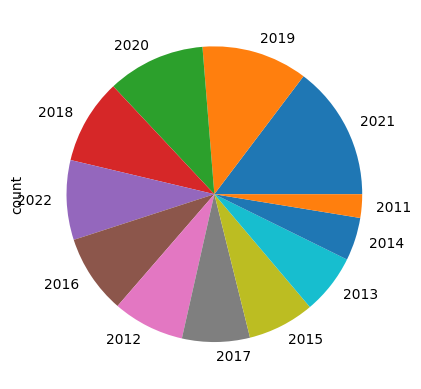

In [ ]:
dataset['year'].value_counts().plot(kind='pie');

In [ ]:
#Fix - 5) Article text, Headline, etc.. contains row text (stop words, lower and upper cases, special characters and numbers, etc..)
# get raw string and return clean string
def clean_text(web_text):

    # Lowercasing
    text_clean = web_text.lower()

    # Converting numbers to words
    text_clean = ' '.join([num2words.num2words(i) if i.isdigit() else i for i in text_clean.split()])

    # Remove special characters and numbers
    text_clean = re.sub(r'[^a-z]', ' ', text_clean)

    # Remove stop words, commonly used words in a language.
    # Examples of stop words in English: “a”, “the”, “is”, “are”, etc.
    stop_words = set(nltk.corpus.stopwords.words("english"))
    text_clean = ' '.join([word for word in text_clean.split() if word not in stop_words])

    # Lemmatization is the process of grouping together the different inflected forms of a word
    # (for example find and found being the same word)
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = []
    text_words = text_clean.split(" ")

    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    text_clean = " ".join(lemmatized_list)

    # Stemming - the process of reducing inflection in words to their root
    # forms such as mapping a group of words to the same stem
    # even if the stem itself is not a valid word in the Language.
    stemmer = PorterStemmer()
    stemmer.stem(text_clean)

    return text_clean

In [ ]:
# Fix all the text in the dataset
for index in dataset.index:

    text_author = dataset.loc[index,'Author']
    dataset.loc[index,'Author'] = fix_author(text_author)

    text_headline = dataset.loc[index,'Headline']
    dataset.loc[index,'Headline'] = clean_text(text_headline)

    text_headline2 = dataset.loc[index,'Second headline']
    dataset.loc[index,'Second headline'] = clean_text(text_headline2)

    text_description = dataset.loc[index,'Description']
    dataset.loc[index,'Description'] = clean_text(text_description)

    text_article = dataset.loc[index,'Article text']
    dataset.loc[index,'Article text'] = clean_text(text_article)

In [ ]:
dataset = dataset[dataset.Category != 'vr']
dataset = dataset[dataset.Category != 'style']
dataset = dataset[dataset.Category != 'travel']
dataset = dataset[dataset.year != '2011']

In [ ]:
# Category to number mapping
dataset['Category_code'] = dataset.Category
dataset['Category_code'] = dataset.Category.cat.codes

# Category to number mapping
dataset['Section_code'] = dataset.Section
dataset['Section_code'] = dataset.Section.cat.codes

In [ ]:
dataset.Category.cat.categories

Index(['business', 'entertainment', 'health', 'news', 'politics', 'sport',
       'style', 'travel', 'vr'],
      dtype='object')

In [ ]:
print(dataset['Category_code'].unique())

[3 0 2 1 5 4]


### Split train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Article text'],
                                                    dataset['Category_code'],
                                                    test_size=0.15,
                                                    random_state=8)

### Text Representation using TF-IDF Vectors as feature

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# Transform documents to a matrix in train
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

# Transform documents to a matrix in test
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(32210, 300)
(5685, 300)


In [ ]:
import pickle
# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


In [ ]:
# Resampling using SMOTE
# Use features_train, the numerical representation of the text data
X_train_resampled, y_train_resampled = smote.fit_resample(features_train, y_train)

In [ ]:
from collections import Counter
# summarize class distribution
counter = Counter(y_train)
print(counter)
counter = Counter(y_train_resampled)
print(counter)


Counter({3: 15395, 5: 13163, 4: 2110, 0: 728, 2: 466, 1: 348})
Counter({3: 15395, 5: 15395, 0: 15395, 4: 15395, 2: 15395, 1: 15395})


## Model

In [ ]:
# Default hyperparameters
svc = svm.SVC(random_state=8)
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Fit the random search model
svc.fit(X_train_resampled, y_train_resampled)

SVC(random_state=8)

### Prediction

In [ ]:
# Find the prediction on the test
svc_predict = svc.predict(features_test)
print("Accuracy score on train: ", accuracy_score(labels_train, svc.predict(features_train)))

Accuracy score on train:  0.9898478733312636


In [ ]:
# Classification report
print("Classification report: ")
print(classification_report(labels_test, svc_predict))

Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.52      0.62       126
           1       0.74      0.45      0.56        65
           2       0.74      0.59      0.66        91
           3       0.91      0.96      0.93      2674
           4       0.88      0.76      0.82       351
           5       0.98      0.97      0.97      2378

    accuracy                           0.93      5685
   macro avg       0.84      0.71      0.76      5685
weighted avg       0.93      0.93      0.93      5685



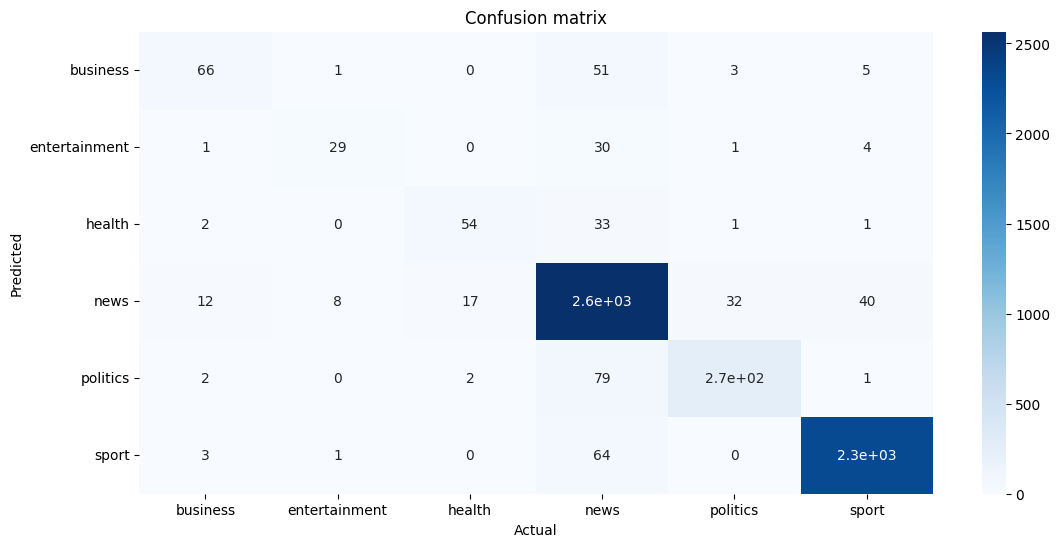

In [ ]:
# Confusion matrix - summary of prediction results on a classification problem
aux_df = dataset[['Category', 'Category_code']].drop_duplicates().sort_values('Category_code')
conf_matrix = confusion_matrix(labels_test, svc_predict)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Category'].values,
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:

# Save the model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)


In [ ]:
import pandas as pd
import pickle
# Function to load the model and TF-IDF vectorizer
def load_model_and_tfidf(model_filename="svm_model.pkl", tfidf_filename="tfidf_vectorizer.pkl"):
  with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
  with open(tfidf_filename, 'rb') as file:
    cv = pickle.load(file)
  print(f"Loaded model from: {model_filename}")
  print(f"Loaded TF-IDF vectorizer from: {tfidf_filename}")
  return loaded_model, cv

In [ ]:
loaded_model, cv = load_model_and_tfidf()

new_articles = "The prosecutor at the International Criminal Court (ICC) is seeking arrest warrants for top Hamas and Israeli figures on charges of war crimes and crimes against humanity over the October 7 attacks on Israel and the subsequent war in Gaza.If approved by a panel of judges, the arrest warrants would be issued for Israeli Prime Minister Benjamin Netanyahu and Defense Minister Yoav Gallant. Warrants are also being sought for three top Hamas officials: Gaza leader Yahya Sinwar, political chief Ismail Haniyah, and Mohammed Diab Ibrahim al-Masri, the leader of Hamas armed wing, who is better known as Mohammed Deif.Here’s what we know about the ICC cases and what they mean for Israel and Hamas."
new_articles_vector = cv.transform([new_articles]).toarray()
prediction = loaded_model.predict(new_articles_vector )

Loaded model from: svm_model.pkl
Loaded TF-IDF vectorizer from: tfidf_vectorizer.pkl


In [ ]:
print(prediction)

[3]


In [ ]:
loaded_model, cv = load_model_and_tfidf()
new_articles = "Premier League clubs will vote on whether to scrap the video assistant referee (VAR) from the start of next season following a proposal put forward by Wolverhampton Wanderers.The vote is set to be held at the annual general meeting between all 20 clubs on June 6, with Wolves requiring 14 clubs to vote in favor of the resolution for it to pass. Any of the league’s 20 clubs can put forward a proposal to be voted on.Wolves have been irked by a number of refereeing decisions this season, leading chairman Jeff Shi to question whether VAR – which was introduced to the Premier League at the start of the 2019-20 season – is “really what football wants or needs” after the team had a goal controversially ruled out against West Ham last month."
new_articles_vector = cv.transform([new_articles]).toarray()
prediction = loaded_model.predict(new_articles_vector )


Loaded model from: svm_model.pkl
Loaded TF-IDF vectorizer from: tfidf_vectorizer.pkl


In [ ]:
print(prediction)

[5]
